Homework 4
Author: Hana McVicker
Github Link: https://github.com/hanamcvicker/EE399


I Reconsider the data from homework one:


In [134]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import torchvision.datasets as datasets
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from numpy.linalg import svd
from sklearn.tree import plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [37]:
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

In [44]:
#(i) Fit the data to a three layer feed forward neural network.
# Define the neural network architecture

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # 1 input feature, 10 neurons in the first hidden layer
        self.fc2 = nn.Linear(10, 10)  # 10 neurons in, 10 neurons out in the second hidden layer 
        self.fc3 = nn.Linear(10, 1)  # 10 neurons in, 1 output feature

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # relu activation function
        x = torch.relu(self.fc2(x))  # relu activation function
        x = self.fc3(x)
        return x
    



In [127]:
# (ii) Using the first 20 data points as training data, fit the neural network. Compute the
# least-square error for each of these over the training points. Then compute the least
# square error of these models on the test data which are the remaining 10 data points.

# Prepare the dataset by reshaping the data to be 2D, as expected by the neural network
X = np.arange(0,31).reshape(-1, 1)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53]).reshape(-1, 1)

# Split the dataset into training and test sets
X_train = torch.Tensor(X[:20])
Y_train = torch.Tensor(Y[:20])
X_test = torch.Tensor(X[20:])
Y_test = torch.Tensor(Y[20:])

# Create TensorDatasets
train_dataset = TensorDataset(X_train,Y_train)
test_dataset = TensorDataset(X_test,Y_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=11, shuffle=False)

# Initialize the network and define the loss function and optimizer
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Train the network
num_epochs = 100
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

# Test the network
with torch.no_grad():
    total_loss = 0
    for inputs, labels in test_loader:
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
    print('Average loss on the test data: {:.4f}'.format(total_loss / len(test_loader)))


Epoch [1/100], Step [2/2], Loss: 1278.7175
Epoch [2/100], Step [2/2], Loss: 7773.0171
Epoch [3/100], Step [2/2], Loss: 1994.7170
Epoch [4/100], Step [2/2], Loss: 634.7965
Epoch [5/100], Step [2/2], Loss: 19.9665
Epoch [6/100], Step [2/2], Loss: 13.5789
Epoch [7/100], Step [2/2], Loss: 19.8228
Epoch [8/100], Step [2/2], Loss: 21.1905
Epoch [9/100], Step [2/2], Loss: 16.1060
Epoch [10/100], Step [2/2], Loss: 17.8000
Epoch [11/100], Step [2/2], Loss: 18.3181
Epoch [12/100], Step [2/2], Loss: 18.7240
Epoch [13/100], Step [2/2], Loss: 30.5473
Epoch [14/100], Step [2/2], Loss: 16.6087
Epoch [15/100], Step [2/2], Loss: 18.0455
Epoch [16/100], Step [2/2], Loss: 17.1918
Epoch [17/100], Step [2/2], Loss: 19.2564
Epoch [18/100], Step [2/2], Loss: 23.7746
Epoch [19/100], Step [2/2], Loss: 16.5681
Epoch [20/100], Step [2/2], Loss: 17.1372
Epoch [21/100], Step [2/2], Loss: 13.5989
Epoch [22/100], Step [2/2], Loss: 25.1849
Epoch [23/100], Step [2/2], Loss: 65.4638
Epoch [24/100], Step [2/2], Loss: 10

In [133]:
# (iii) Repeat (ii) but use the first 10 and last 10 data points as training data. Then fit the
# model to the test data (which are the 10 held out middle data points). Compare these
# results to (ii)


# Prepare the dataset
X = np.arange(0,31).reshape(-1, 1)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53]).reshape(-1, 1)

# Split the dataset into training and test sets
X_train = torch.Tensor(np.concatenate([X[:10], X[-10:]], axis=0))
Y_train = torch.Tensor(np.concatenate([Y[:10], Y[-10:]], axis=0))
X_test = torch.Tensor(X[10:-10])
Y_test = torch.Tensor(Y[10:-10])

# Create TensorDatasets
train_dataset = TensorDataset(X_train,Y_train)
test_dataset = TensorDataset(X_test,Y_test)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=11, shuffle=False)

# Initialize the network and define the loss function and optimizer
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Train the network
num_epochs = 100
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

# Test the network
with torch.no_grad():
    total_loss = 0
    for inputs, labels in test_loader:
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
    print('Average loss on the test data: {:.4f}'.format(total_loss / len(test_loader)))


Epoch [1/100], Step [2/2], Loss: 321549.6875
Epoch [2/100], Step [2/2], Loss: 2506.9011
Epoch [3/100], Step [2/2], Loss: 1866.8802
Epoch [4/100], Step [2/2], Loss: 117.0417
Epoch [5/100], Step [2/2], Loss: 140.0989
Epoch [6/100], Step [2/2], Loss: 76.7242
Epoch [7/100], Step [2/2], Loss: 72.1552
Epoch [8/100], Step [2/2], Loss: 58.2624
Epoch [9/100], Step [2/2], Loss: 73.6411
Epoch [10/100], Step [2/2], Loss: 148.5271
Epoch [11/100], Step [2/2], Loss: 169.8622
Epoch [12/100], Step [2/2], Loss: 107.0573
Epoch [13/100], Step [2/2], Loss: 273.7554
Epoch [14/100], Step [2/2], Loss: 188.6887
Epoch [15/100], Step [2/2], Loss: 92.8705
Epoch [16/100], Step [2/2], Loss: 72.9757
Epoch [17/100], Step [2/2], Loss: 71.0864
Epoch [18/100], Step [2/2], Loss: 143.7491
Epoch [19/100], Step [2/2], Loss: 111.8653
Epoch [20/100], Step [2/2], Loss: 234.7131
Epoch [21/100], Step [2/2], Loss: 233.8095
Epoch [22/100], Step [2/2], Loss: 145.4608
Epoch [23/100], Step [2/2], Loss: 240.0283
Epoch [24/100], Step [

In [55]:
# (iv) Compare the models fit in homework one to the neural networks in (ii) and (iii)

# The error is a lot lower versus homework 1. The neural network is able to fit the data better than the linear regression model.

II Now train a feedforward neural network on the MNIST data set. You will start by
performing the following analysis:


In [144]:
# Load the MNIST data
mnist = fetch_openml('mnist_784')
X = mnist.data[:10000] / 255.0  # use the first 1000 samples and Scale the data to [0, 1]
Y = mnist.target[:10000] # use the first 1000 samples

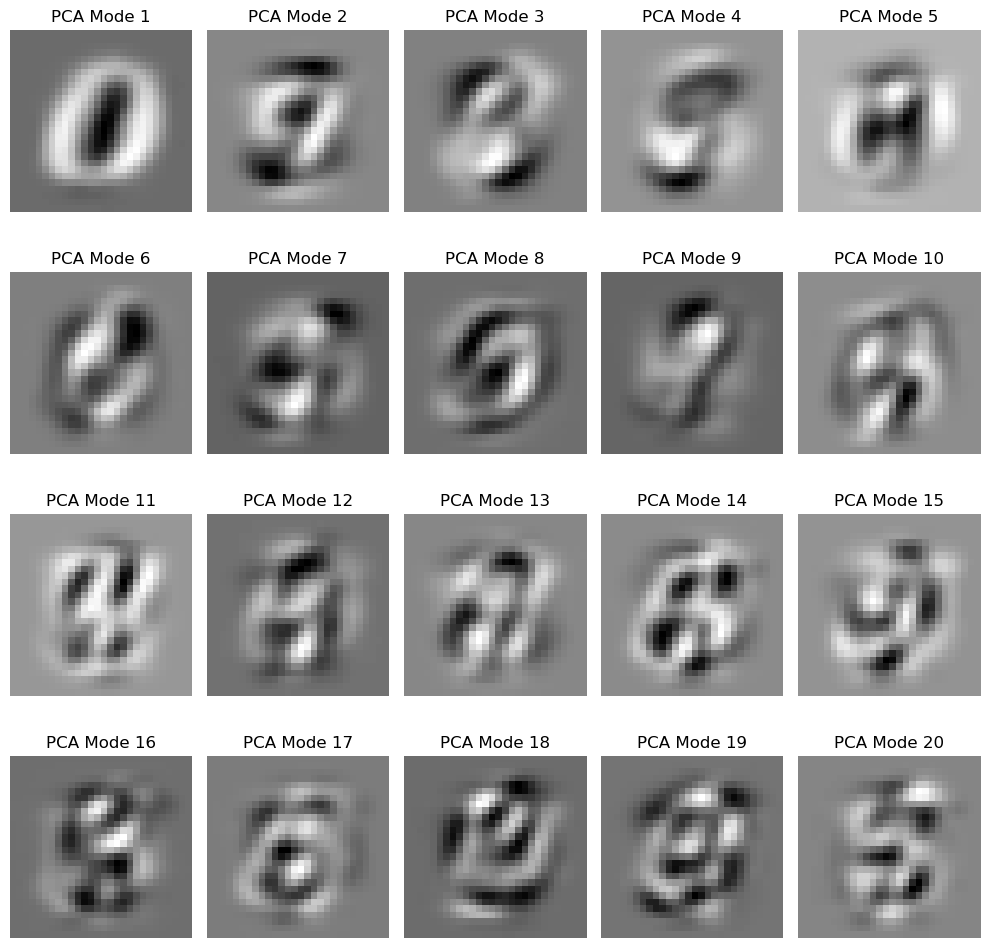

In [146]:
# (i) Compute the first 20 PCA modes of the digit images.

# Compute the first 20 PCA modes
pca = PCA(n_components=20)
pca.fit(X)

first_20_pca_modes = pca.components_

fig, axes = plt.subplots(4, 5, figsize=(10, 10))
axes = axes.ravel()

for i, mode in enumerate(first_20_pca_modes):
    axes[i].imshow(mode.reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'PCA Mode {i+1}')

plt.tight_layout()
plt.show()







In [152]:
# (ii) Build a feed-forward neural network to classify the digits for the MNIST data set.

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784) # flatten the input image                         
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load the MNIST dataset and apply transformations
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Initialize the network and define the loss function and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Train the network
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

# Test the network
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy of the network on test images: {} %'.format(100 * correct / total))




Epoch [1/10], Step [100/938], Loss: 2.2688
Epoch [1/10], Step [200/938], Loss: 2.2217
Epoch [1/10], Step [300/938], Loss: 2.1295
Epoch [1/10], Step [400/938], Loss: 1.9454
Epoch [1/10], Step [500/938], Loss: 1.7291
Epoch [1/10], Step [600/938], Loss: 1.3900
Epoch [1/10], Step [700/938], Loss: 1.1997
Epoch [1/10], Step [800/938], Loss: 0.9420
Epoch [1/10], Step [900/938], Loss: 0.7505
Epoch [2/10], Step [100/938], Loss: 0.5511
Epoch [2/10], Step [200/938], Loss: 0.6254
Epoch [2/10], Step [300/938], Loss: 0.4285
Epoch [2/10], Step [400/938], Loss: 0.5582
Epoch [2/10], Step [500/938], Loss: 0.6228
Epoch [2/10], Step [600/938], Loss: 0.6727
Epoch [2/10], Step [700/938], Loss: 0.4032
Epoch [2/10], Step [800/938], Loss: 0.4801
Epoch [2/10], Step [900/938], Loss: 0.5255
Epoch [3/10], Step [100/938], Loss: 0.2291
Epoch [3/10], Step [200/938], Loss: 0.3088
Epoch [3/10], Step [300/938], Loss: 0.3279
Epoch [3/10], Step [400/938], Loss: 0.3369
Epoch [3/10], Step [500/938], Loss: 0.3488
Epoch [3/10

In [149]:
# (ii) Compare the results of the neural network against LSTM, SVM (support vector machines) and decision tree
# classifiers.
# Results Discussed in the report on Github
# SVM AND DECISION TREE CLASSIFIER

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Create a support vector machine classifier
svm = SVC()

# Fit the classifier to the training data
svm.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = svm.predict(X_test)

# Compute the accuracy of the predictions
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of the SVM:", accuracy)


# Create a decision tree classifier
tree = DecisionTreeClassifier()

# Fit the classifier to the training data
tree.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = tree.predict(X_test)

# Compute the accuracy of the predictions
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of the Decision Tree Classifier:", accuracy)

Accuracy of the SVM: 0.9764285714285714
Accuracy of the Decision Tree Classifier: 0.8712857142857143


In [141]:
# Compare the results of the neural network against LSTM, SVM (support vector machines) and decision tree
# classifiers.

# LSTM

# Check if CUDA is available and set PyTorch to use GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the LSTM network architecture
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Load the MNIST dataset and apply transformations
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Initialize the LSTM network, define the loss function and optimizer
model = LSTMNet(input_size=28, hidden_size=128, num_layers=2, num_classes=10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Train the LSTM network
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28, 28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

# Test the LSTM network
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28, 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy of the LSTM network on images: {} %'.format(100 * correct / total))

Epoch [1/10], Step [100/600], Loss: 2.3155
Epoch [1/10], Step [200/600], Loss: 2.3048
Epoch [1/10], Step [300/600], Loss: 2.3086
Epoch [1/10], Step [400/600], Loss: 2.3082
Epoch [1/10], Step [500/600], Loss: 2.3073
Epoch [1/10], Step [600/600], Loss: 2.3127
Epoch [2/10], Step [100/600], Loss: 2.3020
Epoch [2/10], Step [200/600], Loss: 2.3009
Epoch [2/10], Step [300/600], Loss: 2.3064
Epoch [2/10], Step [400/600], Loss: 2.3111
Epoch [2/10], Step [500/600], Loss: 2.2991
Epoch [2/10], Step [600/600], Loss: 2.3022
Epoch [3/10], Step [100/600], Loss: 2.3020
Epoch [3/10], Step [200/600], Loss: 2.3078
Epoch [3/10], Step [300/600], Loss: 2.2966
Epoch [3/10], Step [400/600], Loss: 2.3035
Epoch [3/10], Step [500/600], Loss: 2.3026
Epoch [3/10], Step [600/600], Loss: 2.3049
Epoch [4/10], Step [100/600], Loss: 2.3039
Epoch [4/10], Step [200/600], Loss: 2.3009
Epoch [4/10], Step [300/600], Loss: 2.3032
Epoch [4/10], Step [400/600], Loss: 2.3069
Epoch [4/10], Step [500/600], Loss: 2.3019
Epoch [4/10